# K-Means Clustering in Python - Daniel Buerger

# Data cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset is statistics for a large number of US Colleges from the 1995 issue of US News and World Report obtained from: 
https://www.kaggle.com/flyingwombat/us-news-and-world-reports-college-data/home

In [2]:
Record = pd.read_csv('College_Data.csv', sep=',', index_col=0)

In [3]:
Record.head(n = 8)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73


We will get information about the dataframe, such as any missing values, null values and the datatype for different features .

In [4]:
Record.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [5]:
Record.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


# Data Exploration

In order to visualise the data with a pairplot (for exploration), lets reduce the number of features to just 4.

In [6]:
Features_of_interest = ['Outstate', 'F.Undergrad', 'Grad.Rate', 'Private']
Record1 = Record[Features_of_interest]

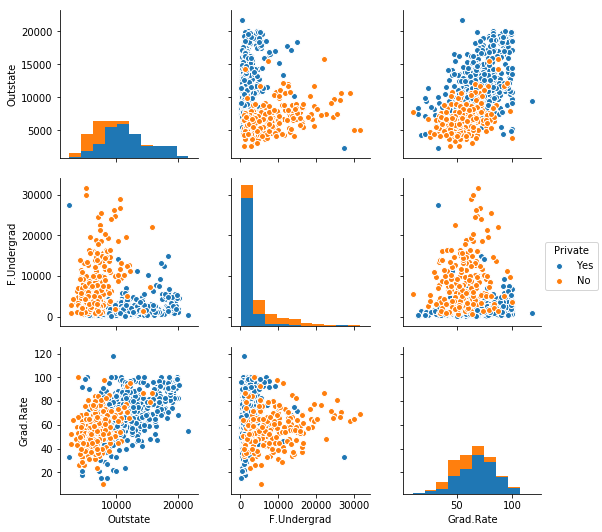

In [7]:
sns.pairplot(Record1, hue='Private')

# K-Means Clustering Algorithm

Importing the KMeans class and configuring it to 3 clusters. We also remove the "Private" feature from our dataset before fitting it.

In [8]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters = 3)

Records_to_fit = Record1.drop('Private', axis = 1)
Records_to_fit.sample(5)

,Outstate,F.Undergrad,Grad.Rate
Oglethorpe University,12900,769,67
McMurry University,6930,880,32
Huntington College,9950,488,47
Colgate University,19510,2649,93
Juniata College,14850,1075,80


In [9]:
kmean.fit(Records_to_fit)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Once the model has been fitted, we have centroids for our 3 clusters. A centroid is a vector, in the 3 coordinate space.

In [10]:
centroids = kmean.cluster_centers_
print("Shape of Centroids Array: " + str(centroids.shape))

print()
print(centroids)

Shape of Centroids Array: (3, 3)

[[14974.99233716  2214.82375479    77.06130268]
 [ 8179.47619048  2111.7547619     59.57142857]
 [ 8005.69791667 14685.64583333    59.70833333]]


In [11]:
from collections import Counter

labels = kmean.labels_
c = Counter(labels)
print(c.most_common())

for cluster_number in range(0,3):
  print("Cluster {} contains {} samples with percentage of {:.2f}%".format(
      cluster_number, c[cluster_number], c[cluster_number]/sum(c.values()) * 100))

[(1, 420), (0, 261), (2, 96)]
Cluster 0 contains 261 samples with percentage of 33.59%
Cluster 1 contains 420 samples with percentage of 54.05%
Cluster 2 contains 96 samples with percentage of 12.36%


# Visualisation 

In [12]:
Record_array = Records_to_fit.values
print(Record_array)

[[ 7440  2885    60]
 [12280  2683    56]
 [11250  1036    54]
 ...
 [ 6900  2793    49]
 [19840  5217    99]
 [ 4990  2988    99]]


### We define and apply a feature transformation function to the Private variable

In [13]:
def feature_trans(x):
    if x == 'Yes': return(0) 
    if x == 'No': return(1)
    
Record['Result'] = Record['Private'].apply(feature_trans)

In [14]:
colors = ["g","r","b"]

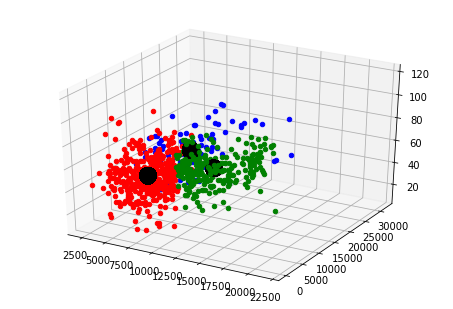

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

for i in range(len(Record_array)):
#     print("Index:\t{}\tLabel: {} ({}) -- Coordinate: {}".format(i, labels[i], colors[labels[i]], Record_array[i]))
    ax.scatter(Record_array[i][0], Record_array[i][1], Record_array[i][2], c = colors[labels[i]])
    ax.scatter(centroids[:, 0],centroids[:, 1],centroids[:, 2], marker = "o", s = 150, linewidths = 5, zorder = 100, c = 'black')


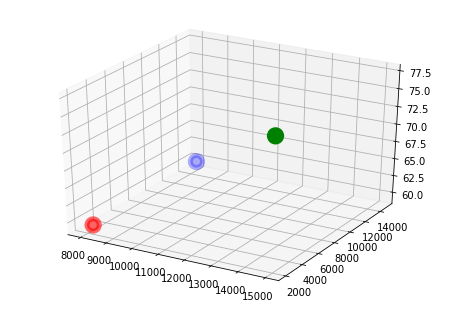

In [16]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(centroids[:, 0],centroids[:, 1],centroids[:, 2], marker = "o", s = 150, linewidths = 5, zorder = 100, c = colors)

# Validation with Silhouette Score

The Silhouette Coefficient is a measure of how well samples are clustered with samples that are similar to themselves. Clustering models with a high Silhouette Coefficient are said to be dense, where samples in the same cluster are similar to each other, and well separated, where samples in different clusters are not very similar to each other.

In [17]:
from sklearn.metrics import silhouette_score as ss

As per SKlearn docs: The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [18]:
mean_sihouette_score = ss(Record_array, labels)
print(mean_sihouette_score)

0.4596319229915689
